In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
solar_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/wind_solar_profile/solar_profile_2019.xlsx")
wind_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/wind_solar_profile/wind_profile_2019.xlsx")

solar_profile = []
wind_profile = []
i_count = 0

for i in range(1, 8761):
    if i % 24 == 0:
        if i == 8761:
            i = 8760
        solar_profile.append(round(solar_data['DE'].iloc[i_count:i].sum() / 24, 5))
        wind_profile.append(round(wind_data['DE'].iloc[i_count:i].sum() / 24, 5))
        i_count = i

In [19]:
years = '2030'
freq = '24'
snapshots = pd.DatetimeIndex([])
period = pd.date_range(start='{}-01-01 00:00'.format(years),
                       freq='{}H'.format(freq),
                       periods=8760 / float(freq))
snapshots = snapshots.append(period)

In [20]:
snapshots_solar = pd.DataFrame(index=snapshots)
snapshots_solar['solar_profile'] = solar_profile
snapshots_solar

,solar_profile
2030-01-01,0.00886
2030-01-02,0.02727
2030-01-03,0.01973
2030-01-04,0.00838
2030-01-05,0.00596
...,...
2030-12-27,0.01728
2030-12-28,0.02989
2030-12-29,0.04530
2030-12-30,0.04391


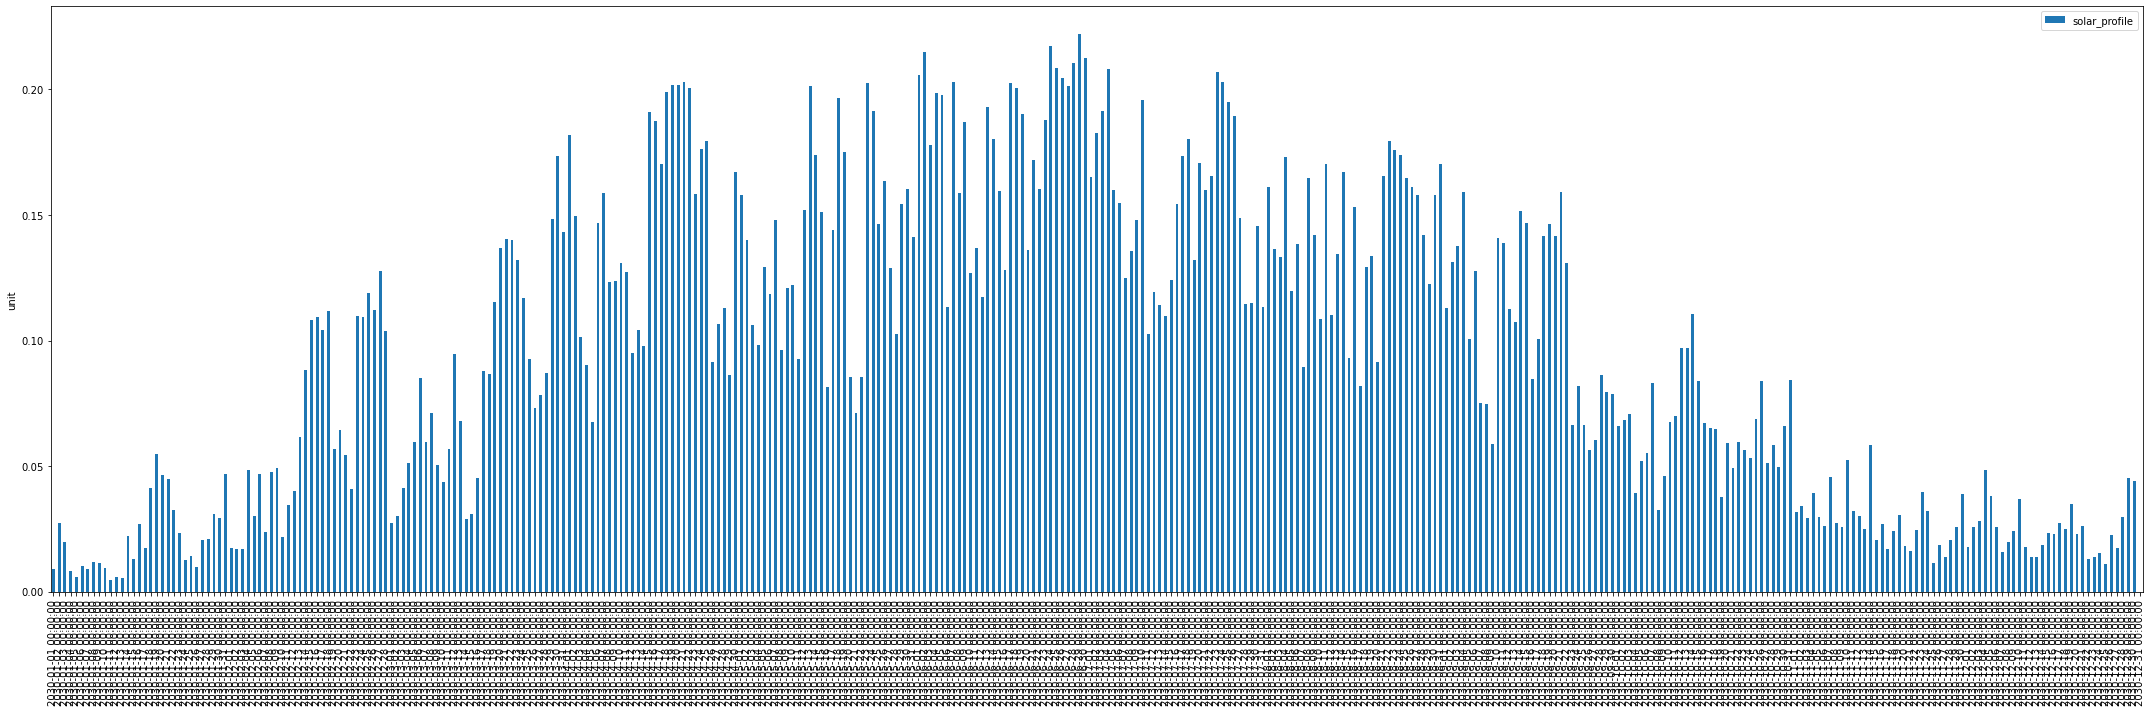

In [27]:
snapshots_solar.plot.bar(ylabel='unit', figsize=(30,10))
plt.tight_layout()

In [22]:
snapshots_wind = pd.DataFrame(index=snapshots)
snapshots_wind['wind_profile'] = wind_profile
snapshots_wind

,wind_profile
2030-01-01,0.67750
2030-01-02,0.59952
2030-01-03,0.22566
2030-01-04,0.40130
2030-01-05,0.50368
...,...
2030-12-27,0.10025
2030-12-28,0.07955
2030-12-29,0.19510
2030-12-30,0.48303


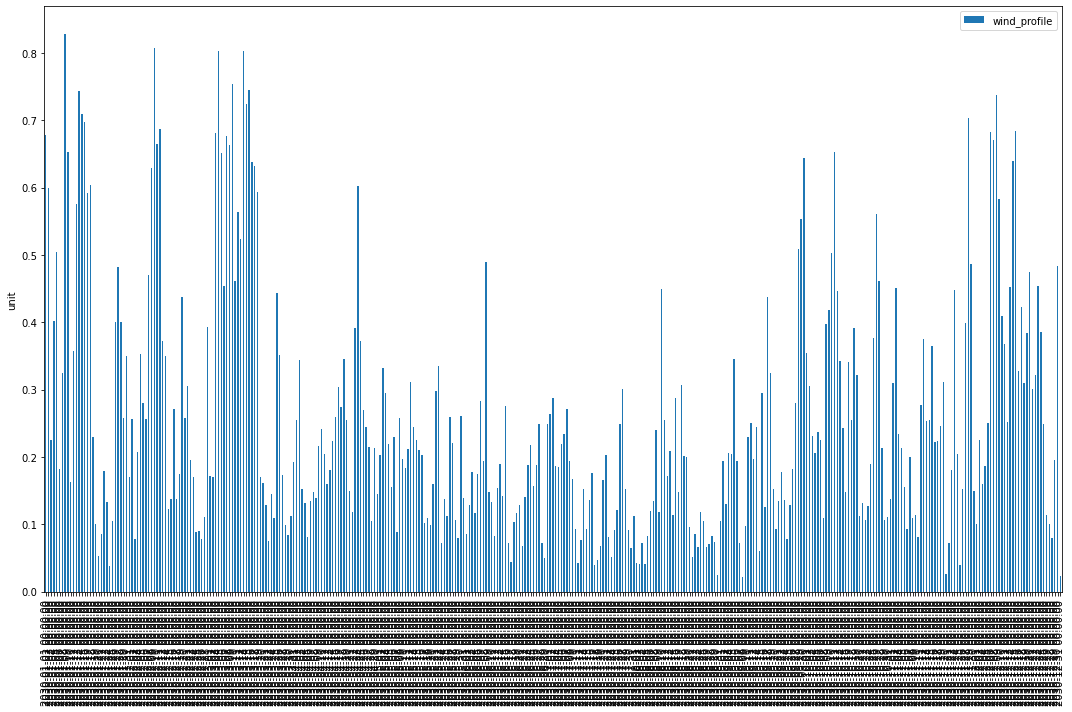

In [25]:
snapshots_wind.plot.bar(ylabel='unit', figsize=(15,10))
plt.tight_layout()